In [ ]:
import os
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
 
warnings.filterwarnings("ignore")
 
from google.colab import drive  
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/dataset_merged_sorted.zip

Archive:  gdrive/MyDrive/dataset_merged_sorted.zip
  inflating: dataset_merged_sorted.csv  


In [ ]:
df=pd.read_csv('dataset_merged_sorted.csv')

In [ ]:
# df=pd.read_csv('/content/gdrive/MyDrive/dataset_sample_sorted.csv')
df=df.dropna()
df=df.drop(columns=['physical_payload','crc_status',	'frequency','bandwidth',	'code_rate'	,	'snr',	'size'	,'mtype',	'rssi','fport','spreading_factor','fcnt'],axis=1)
df.tail()

,time,device_address,gateway
11262996,2020-09-02T12:28:24.654829Z,260126ef,0000024b0b031c97
11262997,2020-09-02T12:28:24.869765Z,26012af6,0000024b0b031c97
11262998,2020-09-02T12:28:36.337618Z,2601282d,0000024b0b031c97
11262999,2020-09-02T12:28:46.780167Z,26012310,0000024b0b031c97
11263000,2020-09-02T12:28:48.364055Z,0016bbf0,0000024b0b031c97


In [ ]:
len(df)

7597638

In [ ]:
gateway_id=df.gateway.unique()
gateway_id

array(['00000f0c210721f2', '00000f0c210281c4', '00800000a0001914',
       '00000f0c22433141', '00000f0c224331c4', '00800000a0001793',
       '0000024b0b031c97', '7276ff002e062804', '00800000a0001794'],
      dtype=object)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


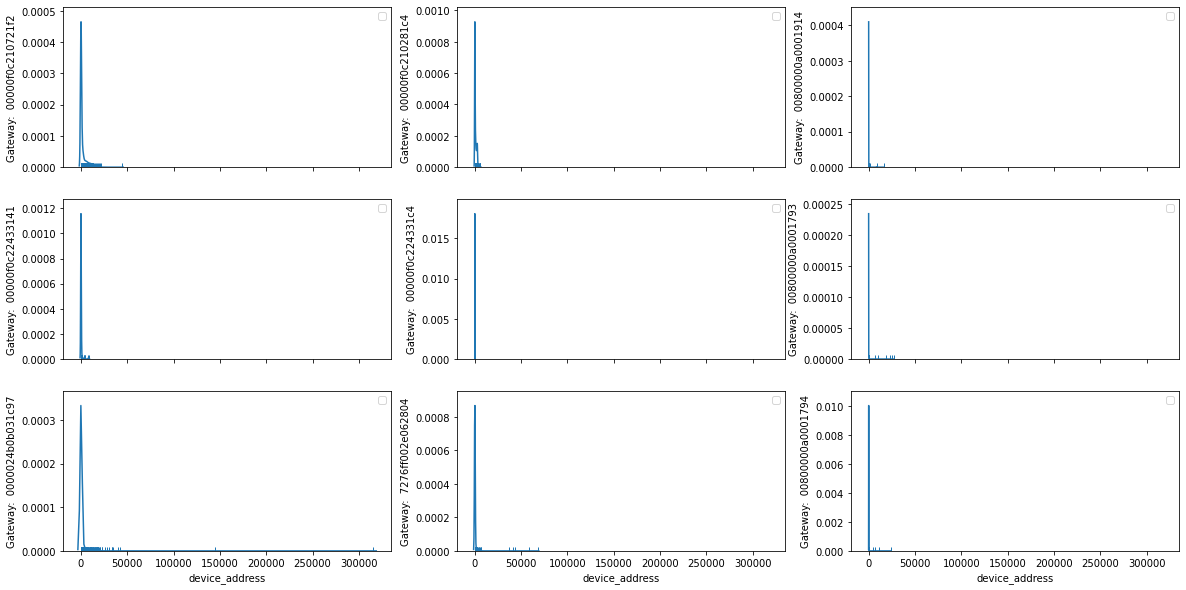

In [ ]:
fig, axes = plt.subplots(3,3 , sharex=True, figsize=(20,10))
c=0

for gname in gateway_id:
  z = df.groupby(by=['gateway']).get_group(gname)
  dups = z.pivot_table(index = ['device_address'], aggfunc ='size')
  axes = axes.flatten()
  sns.distplot(dups, hist=False, rug=True,ax=axes[c])
  axes[c].set_xlabel('device_address')
  axes[c].set_ylabel('Gateway:  '+gname)
  leg = axes[c].legend()
  del z
  
  c=c+1

In [ ]:
df['time'] = df['time'].map(lambda x: x.rstrip('Z').replace('T', ' '))

In [ ]:
df['time']

1152471      2019-02-15 11:14:45.92639
1152472      2019-02-15 11:14:45.92639
1152481     2019-02-15 11:14:47.036526
1152482     2019-02-15 11:14:47.036526
1152483     2019-02-15 11:14:47.070422
                       ...            
11262996    2020-09-02 12:28:24.654829
11262997    2020-09-02 12:28:24.869765
11262998    2020-09-02 12:28:36.337618
11262999    2020-09-02 12:28:46.780167
11263000    2020-09-02 12:28:48.364055
Name: time, Length: 7597638, dtype: object

In [ ]:
df['time'] = df['time'].apply(pd.to_datetime)
df.set_index('time', inplace=True)

In [ ]:
df.sort_index(inplace=True)
df.head()

,device_address,gateway
time,,
2019-02-15 11:14:45.926390,00f34e62,00000f0c210721f2
2019-02-15 11:14:45.926390,00f34e62,00000f0c210721f2
2019-02-15 11:14:47.036526,014bfe1f,00000f0c210721f2
2019-02-15 11:14:47.036526,014bfe1f,00000f0c210721f2
2019-02-15 11:14:47.070422,0065d74a,00000f0c210721f2


In [ ]:
def interval(df):
  x = df.reset_index()
  d = (x.groupby(x.device_address.ne(x.device_address.shift()).cumsum()).apply(lambda x:pd.DataFrame({
                  'start':[x['time'].min()],
                  'end':[x['time'].min()],
                  'event':[x['device_address'].iloc[0]],
                  'count':[len(x)]})
          )
    .reset_index(drop=True)
    .to_dict('r'))
  return(d)

In [ ]:
interval_result = {}
for gname in gateway_id:
  x = df.groupby(by=['gateway']).get_group(gname)
  interval_result[gname] = interval(x)
interval_result
